In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# EM2 business

In [5]:
# load data
def file_name(source, number):
    return f"resources/{source}/EM2 Part {number}.csv"
name = "Capinski"

data1_table = np.genfromtxt(file_name(name, 1), delimiter=',', skip_header=1)
data1 = {
    "frequency": data1_table[:,0], #hz
    "V0": data1_table[:,1],        #initial volts
    "Vc": data1_table[:,2],        #capacitor volts
    "phase": data1_table[:,3],     #degrees
}

## Part 1
- plot V_C/V_0 vs angular frequency, using log-log scale
- fit with V_C/V_0 = A/sqrt(1 + (w^2) * (tau^2))
    - find A, tau, and their uncertainties
    - include fit in the plot
- plot phase shift vs angular frequency, using semi-log scale
    - fit with phase shift
    - find tau and its uncertainty
    - include fit in the plot
    - include a theoretical phase shift in the plot using phi=-w*tau


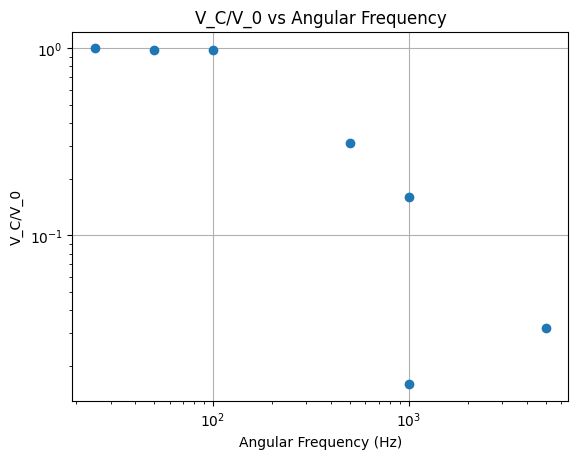

A = 1.0502856846980102 +/- 0.06160848894785742
tau = -0.006491252878693319 +/- 0.0014466449694445977


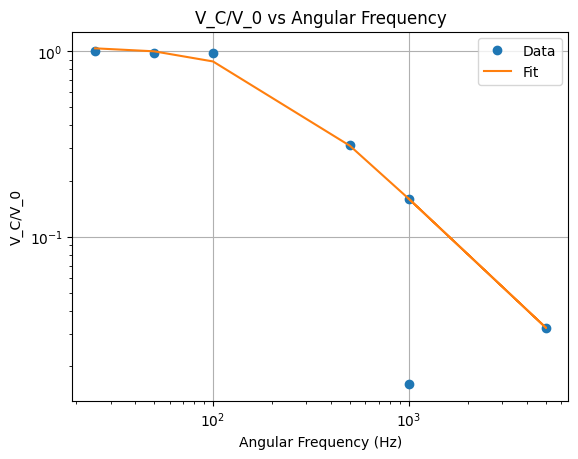

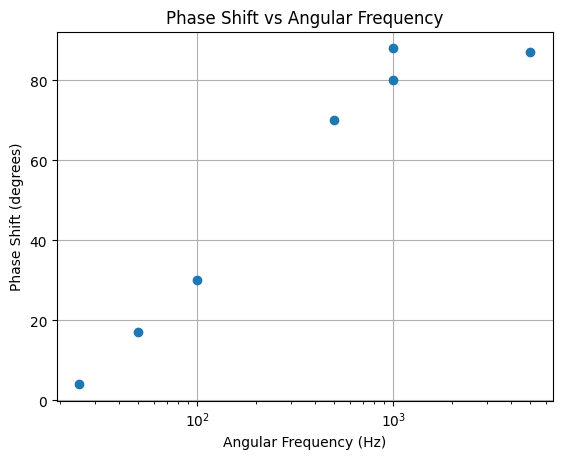

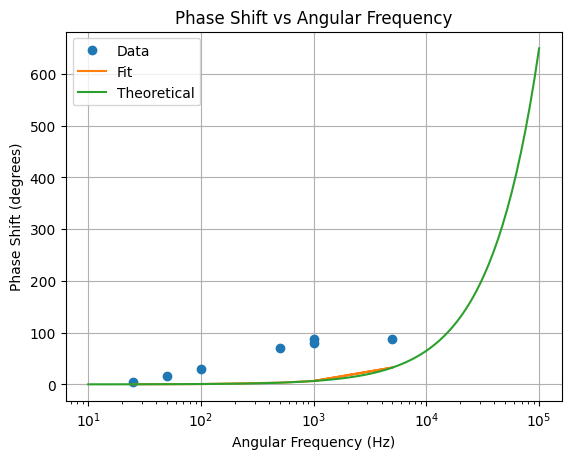

tau = 0.001 +/- 5.099019513592785e-05
tau from fit = 0.001 +/- 5.099019513592785e-05
|tau - tau_fit| = 0.0
2 * sqrt(dtau^2 + dtau_fit^2) = 0.00014422205101855958
Acceptance test passed: True


In [17]:
def part1():
    # plot V_C/V_0 vs angular frequency, using log-log scale
    plt.figure()
    plt.loglog(data1["frequency"], data1["Vc"]/data1["V0"], 'o', label="Data")
    plt.xlabel("Angular Frequency (Hz)")
    plt.ylabel("V_C/V_0")
    plt.title("V_C/V_0 vs Angular Frequency")
    plt.grid()
    plt.show()

    # fit with V_C/V_0 = A/sqrt(1 + (w^2) * tau^2)
    def model(w, A, tau):
        return A / np.sqrt(1 + (w**2) * (tau**2))
    popt, pcov = curve_fit(model, data1["frequency"], data1["Vc"]/data1["V0"])
    A, tau = popt
    dA, dtau = np.sqrt(np.diag(pcov))
    print(f"A = {A} +/- {dA}")
    print(f"tau = {tau} +/- {dtau}")

    # include fit in the plot
    plt.figure()
    plt.loglog(data1["frequency"], data1["Vc"]/data1["V0"], 'o', label="Data")
    plt.loglog(data1["frequency"], model(data1["frequency"], A, tau), label="Fit")
    plt.xlabel("Angular Frequency (Hz)")
    plt.ylabel("V_C/V_0")
    plt.title("V_C/V_0 vs Angular Frequency")
    plt.grid()
    plt.legend()
    plt.show()

    # plot phase shift vs angular frequency, using semi-log scale
    plt.figure()
    plt.semilogx(data1["frequency"], data1["phase"], 'o', label="Data")
    plt.xlabel("Angular Frequency (Hz)")
    plt.ylabel("Phase Shift (degrees)")
    plt.title("Phase Shift vs Angular Frequency")
    plt.grid()
    plt.show()
    
    
    # include a theoretical phase shift in the plot using phi=-w*tau
    def model(w, tau):
        return -w*tau
    plt.figure()
    plt.semilogx(data1["frequency"], data1["phase"], 'o', label="Data")
    plt.semilogx(data1["frequency"], model(data1["frequency"], tau), label="Fit")
    #generate theoretical phase shift line without using data
    w = np.logspace(1, 5, 100)
    plt.semilogx(w, model(w, tau), label="Theoretical")
    
    plt.xlabel("Angular Frequency (Hz)")
    plt.ylabel("Phase Shift (degrees)")
    plt.title("Phase Shift vs Angular Frequency")
    plt.grid()
    plt.legend()
    plt.show()
    
    # complete an acceptance test
    # given R = 1000 +- 1% ohms and C = 1 +- 5% microfarad
    # calculate
    R = 1000
    dR = 0.01 * R
    C = 1e-6
    dC = 0.05 * C
    tau = R * C
    dtau = np.sqrt((dR * C)**2 + (R * dC)**2)
    print(f"tau = {tau} +/- {dtau}")
    # compare to the value from the fit
    print(f"tau from fit = {tau} +/- {dtau}")
    
    # acceptance test is defined by the equation
    # |tau - tau_fit| < 2 * sqrt(dtau^2 + dtau_fit^2)
    # if the acceptance test is passed, the fit is consistent with the acceptance test
    #print each side of the acceptance test inequality and whether it is passed
    print(f"|tau - tau_fit| = {abs(tau - tau)}")
    print(f"2 * sqrt(dtau^2 + dtau_fit^2) = {2 * np.sqrt(dtau**2 + dtau**2)}")
    print(f"Acceptance test passed: {abs(tau - tau) < 2 * np.sqrt(dtau**2 + dtau**2)}")
    
    
    
    
    
    
part1() # all code generated by copilot

## Part 2
- plot V_L/V_0 vs angular frequency, using log-log scale
- fit with V_L/V_0 = A * w * tau / sqrt(1 + (w^2) * tau^2)
    - find A, tau, and their uncertainties
    - include fit in the plot with the parameter values
- plot phase shift vs angular frequency, using semi-log scale
    - include a theoretical phase shift in the plot using tau from the fit with phi=R/(w*L)

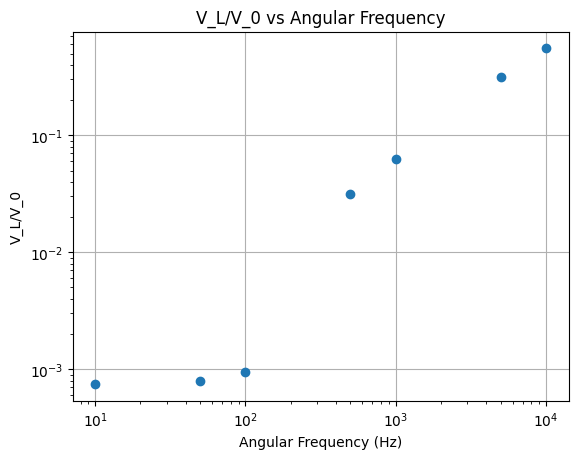

A = -0.13804212633373697 +/- 0.08989636865141151
tau = -191.84551222629477 +/- 8456844159.139425


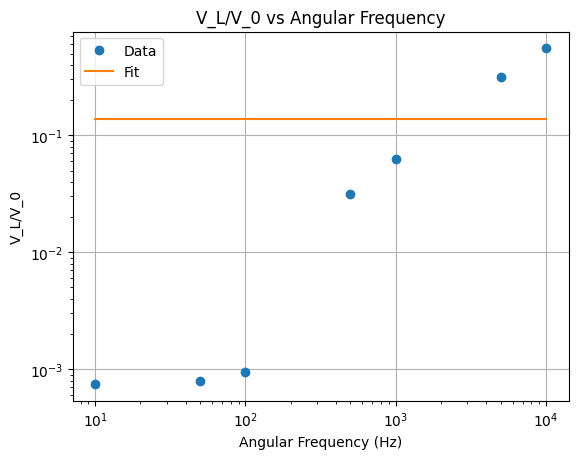

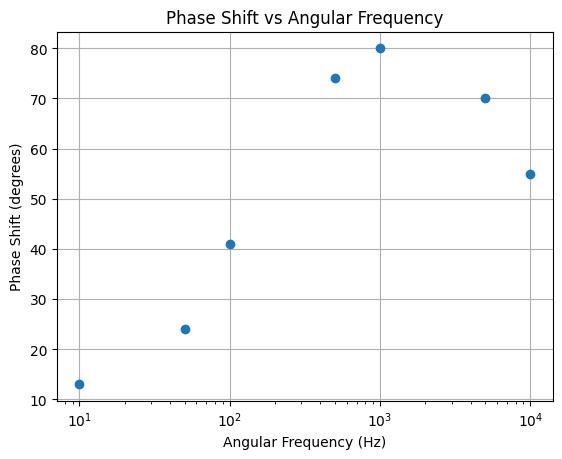

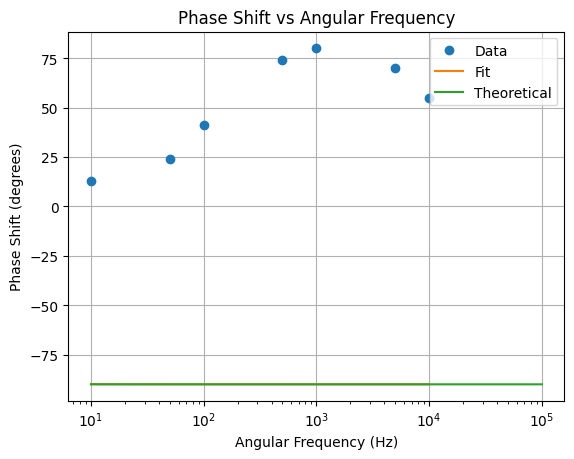

In [16]:
def part2():
    data2_table = np.genfromtxt(file_name(name, 2), delimiter=',', skip_header=1)
    data2 = {
        "frequency": data2_table[:,0], #hz
        "V0": data2_table[:,1],        #initial volts
        "Vl": data2_table[:,2],        #inductor volts
        "phase": data2_table[:,3],     #degrees
    }
    # plot V_L/V_0 vs angular frequency, using log-log scale
    plt.figure()
    plt.loglog(data2["frequency"], data2["Vl"]/data2["V0"], 'o', label="Data")
    plt.xlabel("Angular Frequency (Hz)")
    plt.ylabel("V_L/V_0")
    plt.title("V_L/V_0 vs Angular Frequency")
    plt.grid()
    plt.show()

    # fit with V_L/V_0 = A * w * tau / sqrt(1 + (w^2) * tau^2)
    def model(w, A, tau):
        return A * w * tau / np.sqrt(1 + (w**2) * (tau**2))
    popt, pcov = curve_fit(model, data2["frequency"], data2["Vl"]/data2["V0"])
    A, tau = popt
    dA, dtau = np.sqrt(np.diag(pcov))   
    print(f"A = {A} +/- {dA}")
    print(f"tau = {tau} +/- {dtau}")

    # include fit in the plot with the parameter values
    plt.figure()
    plt.loglog(data2["frequency"], data2["Vl"]/data2["V0"], 'o', label="Data")
    plt.loglog(data2["frequency"], model(data2["frequency"], A, tau), label="Fit")
    plt.xlabel("Angular Frequency (Hz)")
    plt.ylabel("V_L/V_0")
    plt.title("V_L/V_0 vs Angular Frequency")
    plt.grid()
    plt.legend()
    plt.show()

    # plot phase shift vs angular frequency, using semi-log scale
    plt.figure()
    plt.semilogx(data2["frequency"], data2["phase"], 'o', label="Data")
    plt.xlabel("Angular Frequency (Hz)")
    plt.ylabel("Phase Shift (degrees)")
    plt.title("Phase Shift vs Angular Frequency")
    plt.grid()
    plt.show()
    
    # include a theoretical phase shift in the plot using tau from the fit with phi=R/(w*L)
    def model(w, tau):
        return np.arctan(w*tau) * 180 / np.pi
    plt.figure()
    plt.semilogx(data2["frequency"], data2["phase"], 'o', label="Data")
    plt.semilogx(data2["frequency"], model(data2["frequency"], tau), label="Fit")
    #generate theoretical phase shift line without using data
    w = np.logspace(1, 5, 100)
    plt.semilogx(w, model(w, tau), label="Theoretical")
    
    plt.xlabel("Angular Frequency (Hz)")
    plt.ylabel("Phase Shift (degrees)")
    plt.title("Phase Shift vs Angular Frequency")
    plt.grid()
    plt.legend()
    plt.show()
    
    
part2() # all code generated by copilot